In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
"""
!pip install pandas_datareader
# in line 24 may need to use day_name not weekday_name
from pandas_datareader import data as web
import os
import pandas as pd

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year 
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
#        df['Weekday'] = df['Date'].dt.weekday_name  
        df['Weekday'] = df['Date'].dt.day_name       
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()        
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday', 
                    'Week_Number', 'Year_Week', 'Open', 
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None
    
try:
    ticker='LVMUY'
    input_dir = r'D:\systemdefalt\desktop\CS677\assignment2'
    output_file = os.path.join(input_dir, ticker + '.csv')
    df = get_stock(ticker, start_date='2015-01-01', end_date='2019-12-31', 
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)

try:
    ticker='SPY'
    input_dir = r'D:\systemdefalt\desktop\CS677\assignment2'
    output_file = os.path.join(input_dir, ticker + '.csv')
    df = get_stock(ticker, start_date='2014-01-01', end_date='2019-12-31', 
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)

read  1258  lines of data for ticker:  LVMUY
wrote 1258 lines to file: D:\systemdefalt\desktop\CS677\assignment2\LVMUY.csv
read  1510  lines of data for ticker:  SPY
wrote 1510 lines to file: D:\systemdefalt\desktop\CS677\assignment2\SPY.csv


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
this scripts reads your ticker file (e.g. MSFT.csv) and
constructs a list of lines
"""
import os

ticker='LVMUY'
input_dir = r'D:\systemdefalt\desktop\CS677\assignment2'
ticker_file = os.path.join(input_dir, ticker + '.csv')

try:   
    with open(ticker_file) as f:
        lines = f.read().splitlines()
    print('opened file for ticker: ', ticker)
    """    your code for assignment 1 goes here
    """
    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)


opened file for ticker:  LVMUY


In [3]:
#Question1 
#read as pandas frame
import pandas as pd
LV_df = pd.read_csv("LVMUY.csv")
SPY_df = pd.read_csv("SPY.csv")

In [4]:
#add a column 'True_Lable' depending whether the corresponding daily return for that day ri ≥ 0 or ri < 0.
LV_df['True_Lable']=LV_df["Return"].apply(lambda x : '+' if x >= 0 else '-')
LV_df

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Lable
0,2014-01-02,2014,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,35.89,35.97,35.67,35.97,138600.0,27.41,0.000000,27.410000,27.4100,+
1,2014-01-03,2014,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,35.77,35.77,35.56,35.57,89900.0,27.11,-0.011120,27.260000,27.2600,-
2,2014-01-06,2014,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,35.20,35.20,34.94,35.10,82200.0,26.75,-0.013213,27.090000,27.0900,-
3,2014-01-07,2014,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,34.77,34.80,34.54,34.75,75800.0,26.48,-0.009972,26.937500,26.9375,-
4,2014-01-08,2014,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,34.32,34.35,34.10,34.18,104500.0,26.05,-0.016403,26.760000,26.7600,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,2019,12,24,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,91.90,91.90,91.47,91.53,51600.0,87.42,-0.002072,85.540714,83.5206,-
1506,2019-12-26,2019,12,26,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,92.06,92.73,91.54,92.26,57600.0,88.12,0.007976,85.825000,83.6842,+
1507,2019-12-27,2019,12,27,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,93.12,93.59,93.02,93.31,99300.0,89.12,0.011381,86.146429,83.8778,+
1508,2019-12-30,2019,12,30,<bound method PandasDelegate._add_delegate_acc...,52,2019-52,93.40,93.40,92.74,93.07,59500.0,88.89,-0.002572,86.490714,84.0656,-


In [5]:
#add a column 'True_Lable' depending whether the corresponding daily return for that day ri ≥ 0 or ri < 0.
SPY_df['True_Lable']=SPY_df["Return"].apply(lambda x : '+' if x >= 0 else '-')
SPY_df

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Lable
0,2014-01-02,2014,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,183.98,184.07,182.48,182.92,119636900.0,157.02,0.000000,157.020000,157.0200,+
1,2014-01-03,2014,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,183.23,183.60,182.63,182.89,81390600.0,156.99,-0.000164,157.005000,157.0050,-
2,2014-01-06,2014,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.49,183.56,182.08,182.36,108028200.0,156.54,-0.002898,156.850000,156.8500,-
3,2014-01-07,2014,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.09,183.79,182.95,183.48,86144200.0,157.50,0.006142,157.012500,157.0125,+
4,2014-01-08,2014,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.45,183.83,182.89,183.52,96582300.0,157.53,0.000218,157.116000,157.1160,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,2019,12,24,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,321.47,321.52,320.90,321.23,20270000.0,310.23,0.000031,305.515000,297.8884,+
1506,2019-12-26,2019,12,26,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,321.65,322.95,321.64,322.94,30911200.0,311.88,0.005323,306.373571,298.3814,+
1507,2019-12-27,2019,12,27,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,323.74,323.80,322.28,322.86,42528800.0,311.80,-0.000248,307.030714,298.8820,-
1508,2019-12-30,2019,12,30,<bound method PandasDelegate._add_delegate_acc...,52,2019-52,322.95,323.10,320.55,321.08,49729100.0,310.08,-0.005513,307.632857,299.3312,-


In [6]:
#Question1.2
#get the year 1,2,3
LV_123 = LV_df[LV_df.Year < 2017]
SPY_123 = SPY_df[SPY_df['Year'] < 2017]

In [7]:
SPY_123

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Lable
0,2014-01-02,2014,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,183.98,184.07,182.48,182.92,119636900.0,157.02,0.000000,157.020000,157.0200,+
1,2014-01-03,2014,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,183.23,183.60,182.63,182.89,81390600.0,156.99,-0.000164,157.005000,157.0050,-
2,2014-01-06,2014,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.49,183.56,182.08,182.36,108028200.0,156.54,-0.002898,156.850000,156.8500,-
3,2014-01-07,2014,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.09,183.79,182.95,183.48,86144200.0,157.50,0.006142,157.012500,157.0125,+
4,2014-01-08,2014,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.45,183.83,182.89,183.52,96582300.0,157.53,0.000218,157.116000,157.1160,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2016-12-23,2016,12,23,<bound method PandasDelegate._add_delegate_acc...,51,2016-51,225.43,225.72,225.21,225.71,36697800.0,205.94,0.001464,205.154286,198.4482,+
752,2016-12-27,2016,12,27,<bound method PandasDelegate._add_delegate_acc...,52,2016-52,226.02,226.73,226.00,226.27,42672500.0,206.45,0.002481,205.537143,198.7110,+
753,2016-12-28,2016,12,28,<bound method PandasDelegate._add_delegate_acc...,52,2016-52,226.57,226.59,224.27,224.40,64095000.0,204.74,-0.008265,205.610000,198.9530,-
754,2016-12-29,2016,12,29,<bound method PandasDelegate._add_delegate_acc...,52,2016-52,224.48,224.89,223.84,224.35,48696100.0,204.70,-0.000223,205.644286,199.1700,-


In [8]:
#get the trading days
LV_123['Trading_days'] = range(1, len(LV_123) + 1)
SPY_123['Trading_days'] = range(1, len(SPY_123) + 1)

D:\TEMP/ipykernel_6872/2718434819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LV_123['Trading_days'] = range(1, len(LV_123) + 1)
D:\TEMP/ipykernel_6872/2718434819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY_123['Trading_days'] = range(1, len(SPY_123) + 1)


In [9]:
#get trading days with lable
LV_123['Trading_day_Lable'] = LV_123['Trading_days'].astype(str) + LV_123['True_Lable'].astype(str)
LV_123 = LV_123.drop('Trading_days', 1)
LV_123

D:\TEMP/ipykernel_6872/2971941103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LV_123['Trading_day_Lable'] = LV_123['Trading_days'].astype(str) + LV_123['True_Lable'].astype(str)
D:\TEMP/ipykernel_6872/2971941103.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  LV_123 = LV_123.drop('Trading_days', 1)


,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Lable,Trading_day_Lable
0,2014-01-02,2014,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,35.89,35.97,35.67,35.97,138600.0,27.41,0.000000,27.410000,27.4100,+,1+
1,2014-01-03,2014,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,35.77,35.77,35.56,35.57,89900.0,27.11,-0.011120,27.260000,27.2600,-,2-
2,2014-01-06,2014,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,35.20,35.20,34.94,35.10,82200.0,26.75,-0.013213,27.090000,27.0900,-,3-
3,2014-01-07,2014,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,34.77,34.80,34.54,34.75,75800.0,26.48,-0.009972,26.937500,26.9375,-,4-
4,2014-01-08,2014,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,34.32,34.35,34.10,34.18,104500.0,26.05,-0.016403,26.760000,26.7600,-,5-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2016-12-23,2016,12,23,<bound method PandasDelegate._add_delegate_acc...,51,2016-51,37.41,37.51,37.41,37.46,44100.0,33.82,-0.000800,33.733571,32.7142,-,752-
752,2016-12-27,2016,12,27,<bound method PandasDelegate._add_delegate_acc...,52,2016-52,37.45,37.67,37.45,37.50,44300.0,33.86,0.001068,33.750714,32.7366,+,753+
753,2016-12-28,2016,12,28,<bound method PandasDelegate._add_delegate_acc...,52,2016-52,37.46,37.56,37.31,37.53,38000.0,33.88,0.000800,33.720714,32.7620,+,754+
754,2016-12-29,2016,12,29,<bound method PandasDelegate._add_delegate_acc...,52,2016-52,37.49,37.63,37.46,37.62,50700.0,33.96,0.002398,33.737143,32.7862,+,755+


In [10]:
SPY_123['Trading_day_Lable'] = SPY_123['Trading_days'].astype(str) + SPY_123['True_Lable'].astype(str)
SPY_123 = SPY_123.drop('Trading_days',1)
SPY_123

D:\TEMP/ipykernel_6872/1119358825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY_123['Trading_day_Lable'] = SPY_123['Trading_days'].astype(str) + SPY_123['True_Lable'].astype(str)
D:\TEMP/ipykernel_6872/1119358825.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  SPY_123 = SPY_123.drop('Trading_days',1)


,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Lable,Trading_day_Lable
0,2014-01-02,2014,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,183.98,184.07,182.48,182.92,119636900.0,157.02,0.000000,157.020000,157.0200,+,1+
1,2014-01-03,2014,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,183.23,183.60,182.63,182.89,81390600.0,156.99,-0.000164,157.005000,157.0050,-,2-
2,2014-01-06,2014,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.49,183.56,182.08,182.36,108028200.0,156.54,-0.002898,156.850000,156.8500,-,3-
3,2014-01-07,2014,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.09,183.79,182.95,183.48,86144200.0,157.50,0.006142,157.012500,157.0125,+,4+
4,2014-01-08,2014,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.45,183.83,182.89,183.52,96582300.0,157.53,0.000218,157.116000,157.1160,+,5+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2016-12-23,2016,12,23,<bound method PandasDelegate._add_delegate_acc...,51,2016-51,225.43,225.72,225.21,225.71,36697800.0,205.94,0.001464,205.154286,198.4482,+,752+
752,2016-12-27,2016,12,27,<bound method PandasDelegate._add_delegate_acc...,52,2016-52,226.02,226.73,226.00,226.27,42672500.0,206.45,0.002481,205.537143,198.7110,+,753+
753,2016-12-28,2016,12,28,<bound method PandasDelegate._add_delegate_acc...,52,2016-52,226.57,226.59,224.27,224.40,64095000.0,204.74,-0.008265,205.610000,198.9530,-,754-
754,2016-12-29,2016,12,29,<bound method PandasDelegate._add_delegate_acc...,52,2016-52,224.48,224.89,223.84,224.35,48696100.0,204.70,-0.000223,205.644286,199.1700,-,755-


In [11]:
print("the default probability p∗ that the next day is a ”up” day is:",0.25)

the default probability p∗ that the next day is a ”up” day is: 0.25


In [12]:
#Question1.3
#For my stock
LV_true_lable = list(LV_123['True_Lable'])

In [14]:
#k = 1
LV_k1 = []
for i in range(len(LV_true_lable)-1):
    list1 = LV_true_lable[i:i + 2]
    LV_k1.append(list1)

In [16]:
print("the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=1)(my stock):",LV_k1.count(['-','+'])/len(LV_k1))

the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=1)(my stock): 0.2543046357615894


In [17]:
#k = 2
LV_k2 = []
for i in range(len(LV_true_lable)-2):
    list2 = LV_true_lable[i:i + 3]
    LV_k2.append(list2)

In [19]:
print("the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=2)(my stock):",LV_k2.count(['-','-','+'])/len(LV_k2))

the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=2)(my stock): 0.1220159151193634


In [20]:
#k = 3
LV_k3 = []
for i in range(len(LV_true_lable)-3):
    list3 = LV_true_lable[i:i + 4]
    LV_k3.append(list3)

In [22]:
print("the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=3)(my stock):",LV_k3.count(['-','-','-','+'])/len(LV_k3))

the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=3)(my stock): 0.05312084993359894


In [23]:
#Question1.4
print("the probability that after seeing k consecutive 'up days', the next day is an 'down day'(k=1)(my stock):",LV_k1.count(['+','-'])/len(LV_k1))

the probability that after seeing k consecutive 'up days', the next day is an 'down day'(k=1)(my stock): 0.2543046357615894


In [24]:
print("the probability that after seeing k consecutive 'up days', the next day is an 'down day'(k=2)(my stock):",LV_k2.count(['+','+','-'])/len(LV_k2))

the probability that after seeing k consecutive 'up days', the next day is an 'down day'(k=2)(my stock): 0.13793103448275862


In [25]:
print("the probability that after seeing k consecutive 'up days', the next day is an 'down day'(k=3)(my stock):",LV_k3.count(['+','+','+','-'])/len(LV_k3))

the probability that after seeing k consecutive 'up days', the next day is an 'down day'(k=3)(my stock): 0.06905710491367861


In [26]:
#for SPY
SPY_true_lable = list(SPY_123['True_Lable'])

In [27]:
#k = 1
SPY_k1 = []
for i in range(len(SPY_true_lable)-1):
    list1 = SPY_true_lable[i:i + 2]
    SPY_k1.append(list1)

In [28]:
print("the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=1)(SPY):",SPY_k1.count(['-','+'])/len(SPY_k1))

the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=1)(SPY): 0.271523178807947


In [29]:
print("the probability that after seeing k consecutive 'up days', the next day is  'down day'(k=1)(SPY):",SPY_k1.count(['+','-'])/len(SPY_k1))

the probability that after seeing k consecutive 'up days', the next day is  'down day'(k=1)(SPY): 0.2728476821192053


In [30]:
#k = 2
SPY_k2 = []
for i in range(len(SPY_true_lable)-2):
    list2 = SPY_true_lable[i:i + 3]
    SPY_k2.append(list2)

In [31]:
print("the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=2)(SPY):",SPY_k2.count(['-','-','+'])/len(SPY_k2))

the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=2)(SPY): 0.11936339522546419


In [32]:
print("the probability that after seeing k consecutive 'up days', the next day is a 'down day'(k=2)(SPY):",SPY_k2.count(['+','+','-'])/len(SPY_k2))

the probability that after seeing k consecutive 'up days', the next day is a 'down day'(k=2)(SPY): 0.13395225464190982


In [33]:
#k = 3
SPY_k3 = []
for i in range(len(SPY_true_lable)-3):
    list3 = SPY_true_lable[i:i + 4]
    SPY_k3.append(list3)

In [34]:
print("the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=3)(SPY):",SPY_k3.count(['-','-','-','+'])/len(SPY_k3))

the probability that after seeing k consecutive 'down days', the next day is an 'up day'(k=3)(SPY): 0.0398406374501992


In [35]:
print("the probability that after seeing k consecutive 'up days', the next day is a 'down day'(k=3)(SPY):",SPY_k3.count(['+','+','+','-'])/len(SPY_k3))

the probability that after seeing k consecutive 'up days', the next day is a 'down day'(k=3)(SPY): 0.07304116865869854


In [36]:
#Question2.1
#get the year 4,5
LV_45 = LV_df[(LV_df.Year > 2017)]
SPY_45 = SPY_df[SPY_df.Year > 2017]

In [37]:
LV_45

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Lable
1007,2018-01-02,2018,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2018-00,58.13,58.40,57.97,58.25,65900.0,53.61,-0.007666,54.230714,53.7112,-
1008,2018-01-03,2018,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2018-00,58.04,58.55,58.04,58.41,54100.0,53.75,0.002747,54.266429,53.7614,+
1009,2018-01-04,2018,1,4,<bound method PandasDelegate._add_delegate_acc...,0,2018-00,59.48,59.52,59.00,59.11,110300.0,54.40,0.011984,54.323571,53.8154,+
1010,2018-01-05,2018,1,5,<bound method PandasDelegate._add_delegate_acc...,0,2018-00,59.63,60.20,59.51,60.18,64800.0,55.38,0.018102,54.505000,53.8614,+
1011,2018-01-08,2018,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2018-01,58.69,58.90,58.62,58.90,165900.0,54.20,-0.021270,54.575000,53.8906,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,2019,12,24,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,91.90,91.90,91.47,91.53,51600.0,87.42,-0.002072,85.540714,83.5206,-
1506,2019-12-26,2019,12,26,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,92.06,92.73,91.54,92.26,57600.0,88.12,0.007976,85.825000,83.6842,+
1507,2019-12-27,2019,12,27,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,93.12,93.59,93.02,93.31,99300.0,89.12,0.011381,86.146429,83.8778,+
1508,2019-12-30,2019,12,30,<bound method PandasDelegate._add_delegate_acc...,52,2019-52,93.40,93.40,92.74,93.07,59500.0,88.89,-0.002572,86.490714,84.0656,-


### Question 2

In [38]:
#For my stock
# get the true lable list
LV_lable = list(LV_df['True_Lable'])
LV123_lable = list(LV_123['True_Lable'])
LV45_lable = list(LV_45['True_Lable'])

In [39]:
def pre(w):
    LV45_lable_pre = []
    for i in range(len(LV45_lable)- w-1):
        list1 = LV45_lable[i:i + w]
        LV45_lable_pre.append(list1)
        N = list(range(w+1,len(LV45_lable_pre)+w+1))
            
    NT = []
    for row in LV45_lable_pre:
        T = list('+')
        t = row + T
        NT.append(t)    
        
    NF = []
    for row in LV45_lable_pre:
        F = list('-')
        f = row + F
        NF.append(f)

    LV123_lable_train = []
    for i in range(len(LV123_lable)- w):
        list2 = LV123_lable[i:i+w+1]
        LV123_lable_train.append(list2)


    LV_lable_pre = []
    for j in range(len(NF)):
        if LV123_lable_train.count(NT[j]) > LV123_lable_train.count(NF[j]):
            lable = '+'
        else:
            lable = '-'
        LV_lable_pre.append(lable)
    
    pre = {'days':N,'prelabel':LV_lable_pre}
    LV_pre = pd.DataFrame(pre)
    LV_pre.drop([len(LV_pre)-1], inplace=True)

    return LV_pre

In [40]:
LV_pre_w2 = pre(2)
LV_pre_w3 = pre(3)
LV_pre_w4 = pre(4)

In [42]:
#accuracy for w=2
true_label = LV_45['True_Lable'][2:len(LV_pre_w2)+2]
true_label = list(true_label)
LV_pre_w2['true_label'] = true_label

def acc(a, b):
    if a == b:
        return 1
    else:
        return 0
LV_pre_w2['accuracy'] = LV_pre_w2.apply(lambda x : acc(x['prelabel'],x['true_label']),axis = 1)
LV_pre_w2['accuracy'].value_counts(normalize=True)

1    0.537074
0    0.462926
Name: accuracy, dtype: float64

In [43]:
lvw2acc = 0.537074

In [44]:
#accuracy for w=3
true_label = LV_45['True_Lable'][3:len(LV_pre_w3)+3]
true_label = list(true_label)
LV_pre_w3['true_label'] = true_label

LV_pre_w3['accuracy'] = LV_pre_w3.apply(lambda x : acc(x['prelabel'],x['true_label']),axis = 1)
LV_pre_w3['accuracy'].value_counts(normalize=True)

1    0.560241
0    0.439759
Name: accuracy, dtype: float64

In [45]:
lvw3acc = 0.560241

In [46]:
#accuracy for w=4
true_label = LV_45['True_Lable'][4:len(LV_pre_w4)+4]
true_label = list(true_label)
LV_pre_w4['true_label'] = true_label

LV_pre_w4['accuracy'] = LV_pre_w4.apply(lambda x : acc(x['prelabel'],x['true_label']),axis = 1)
LV_pre_w4['accuracy'].value_counts(normalize=True)

1    0.515091
0    0.484909
Name: accuracy, dtype: float64

In [47]:
lvw4acc = 0.515091

    For my stock, when w=3, the accuracy = 0.56, which is highest.

In [48]:
#For SPY
# get the true lable list
SPY_lable = list(SPY_df['True_Lable'])
SPY123_lable = list(SPY_123['True_Lable'])
SPY45_lable = list(SPY_45['True_Lable'])

In [49]:
def pred(w):
    SPY45_lable_pre = []
    for i in range(len(SPY45_lable)- w-1):
        list1 = SPY45_lable[i:i + w]
        SPY45_lable_pre.append(list1)
        N = list(range(w+1,len(SPY45_lable_pre)+w+1))
            
    NT = []
    for row in SPY45_lable_pre:
        T = list('+')
        t = row + T
        NT.append(t)    
        
    NF = []
    for row in SPY45_lable_pre:
        F = list('-')
        f = row + F
        NF.append(f)

    SPY123_lable_train = []
    for i in range(len(SPY123_lable)- w):
        list2 = SPY123_lable[i:i+w+1]
        SPY123_lable_train.append(list2)


    SPY_lable_pre = []
    for j in range(len(NF)):
        if SPY123_lable_train.count(NT[j]) > SPY123_lable_train.count(NF[j]):
            lable = '+'
        else:
            lable = '-'
        SPY_lable_pre.append(lable)
    
    pre = {'days':N,'prelabel':SPY_lable_pre}
    SPY_pre = pd.DataFrame(pre)
    SPY_pre.drop([len(SPY_pre)-1], inplace=True)

    return SPY_pre


In [50]:
SPY_pre_w2 = pred(2)
SPY_pre_w3 = pred(3)
SPY_pre_w4 = pred(4)

In [51]:
#accuracy for w=2
true_label = SPY_45['True_Lable'][2:len(SPY_pre_w2)+2]
true_label = list(true_label)
SPY_pre_w2['true_label'] = true_label

SPY_pre_w2['accuracy'] = SPY_pre_w2.apply(lambda x : acc(x['prelabel'],x['true_label']),axis = 1)
SPY_pre_w2['accuracy'].value_counts(normalize=True)

1    0.527054
0    0.472946
Name: accuracy, dtype: float64

In [52]:
spyw2acc = 0.527054

In [53]:
#accuracy for w=3
true_label = SPY_45['True_Lable'][3:len(SPY_pre_w3)+3]
true_label = list(true_label)
SPY_pre_w3['true_label'] = true_label

SPY_pre_w3['accuracy'] = SPY_pre_w3.apply(lambda x : acc(x['prelabel'],x['true_label']),axis = 1)
SPY_pre_w3['accuracy'].value_counts(normalize=True)

1    0.532129
0    0.467871
Name: accuracy, dtype: float64

In [54]:
spyw3acc = 0.532129

In [55]:
#accuracy for w=4
true_label = SPY_45['True_Lable'][4:len(SPY_pre_w4)+4]
true_label = list(true_label)
SPY_pre_w4['true_label'] = true_label

SPY_pre_w4['accuracy'] = SPY_pre_w4.apply(lambda x : acc(x['prelabel'],x['true_label']),axis = 1)
SPY_pre_w4['accuracy'].value_counts(normalize=True)

1    0.537223
0    0.462777
Name: accuracy, dtype: float64

In [56]:
spyw4acc = 0.537223

For SPY stock, when w=2, the accuracy = 0.56 which is highest.

In [57]:
#Question3.4
#for my stock
LV_pre_combine = pd.merge(LV_pre_w2, LV_pre_w3, on=["days"])

In [58]:
LV_pre_combine.drop(columns=['accuracy_x', 'accuracy_y','true_label_y'],inplace= True)
LV_pre_combine.rename(columns = {'prelabel_y':'prew3', 'prelabel_x':'prew2', 'true_label_x':'true_label'}, inplace = True)

In [59]:
LV_pre_combine = pd.merge(LV_pre_combine, LV_pre_w4, on=["days"])

In [60]:
LV_pre_combine.drop(columns=['accuracy','true_label_x'],inplace= True)
LV_pre_combine.rename(columns = {'prelabel':'prew4', 'true_label_y':'true_label'}, inplace = True)
LV_pre_combine

,days,prew2,prew3,prew4,true_label
0,5,-,-,-,-
1,6,+,+,+,-
2,7,+,+,+,-
3,8,+,+,+,-
4,9,+,+,-,+
...,...,...,...,...,...
492,497,+,+,-,+
493,498,-,+,-,+
494,499,-,-,-,-
495,500,+,+,+,+


In [61]:
LV_pre_combine1 = pd.get_dummies(LV_pre_combine, drop_first = True, columns=[ 'prew2' ,'prew3','prew4','true_label'])

LV_pre_combine1 #1 for '-', 0 for '+'

,days,prew2_-,prew3_-,prew4_-,true_label_-
0,5,1,1,1,1
1,6,0,0,0,1
2,7,0,0,0,1
3,8,0,0,0,1
4,9,0,0,1,0
...,...,...,...,...,...
492,497,0,0,1,0
493,498,1,0,1,0
494,499,1,1,1,1
495,500,0,0,0,0


In [62]:
LV_combine = LV_pre_combine1[['prew2_-','prew3_-','prew4_-']]
LV_combine["sum"] = LV_combine.sum(axis=1)
LV_combine

D:\TEMP/ipykernel_6872/47738388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LV_combine["sum"] = LV_combine.sum(axis=1)


,prew2_-,prew3_-,prew4_-,sum
0,1,1,1,3
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,1,1
...,...,...,...,...
492,0,0,1,1
493,1,0,1,2
494,1,1,1,3
495,0,0,0,0


In [63]:
sum_list = list(LV_combine['sum'])

In [64]:
ensemble = []
for i in sum_list:
    if i > 1:
        label = '-'
    else:
        label = '+'
    ensemble.append(label)

In [65]:
LV_pre_combine['ensemble_pre']= ensemble
LV_pre_combine

,days,prew2,prew3,prew4,true_label,ensemble_pre
0,5,-,-,-,-,-
1,6,+,+,+,-,+
2,7,+,+,+,-,+
3,8,+,+,+,-,+
4,9,+,+,-,+,+
...,...,...,...,...,...,...
492,497,+,+,-,+,+
493,498,-,+,-,+,-
494,499,-,-,-,-,-
495,500,+,+,+,+,+


In [66]:
LV_pre_combine['accuracy'] = LV_pre_combine.apply(lambda x : acc(x['ensemble_pre'],x['true_label']),axis = 1)
LV_pre_combine['accuracy'].value_counts(normalize=True)

1    0.535211
0    0.464789
Name: accuracy, dtype: float64

In [67]:
lvenacc = 0.535211

The accuracy of ensemble is 0.54 for my stock.

In [68]:
LV_pre_combine2 = pd.get_dummies(LV_pre_combine, drop_first = True, columns=['prew2','prew3','prew4','true_label','ensemble_pre'])
LV_pre_combine2

,days,accuracy,prew2_-,prew3_-,prew4_-,true_label_-,ensemble_pre_-
0,5,1,1,1,1,1,1
1,6,0,0,0,0,1,0
2,7,0,0,0,0,1,0
3,8,0,0,0,0,1,0
4,9,1,0,0,1,0,0
...,...,...,...,...,...,...,...
492,497,1,0,0,1,0,0
493,498,0,1,0,1,0,1
494,499,1,1,1,1,1,1
495,500,1,0,0,0,0,0


In [69]:
from sklearn.metrics import confusion_matrix
#because in my dataframe, 1 is for'-', the true and false will exchange
lventp, lvenfn, lvenfp, lventn = confusion_matrix(LV_pre_combine2['true_label_-'], LV_pre_combine2['ensemble_pre_-']).ravel()
lvw2tp, lvw2fn, lvw2fp, lvw2tn = confusion_matrix(LV_pre_combine2['true_label_-'], LV_pre_combine2['prew2_-']).ravel()
lvw3tp, lvw3fn, lvw3fp, lvw3tn = confusion_matrix(LV_pre_combine2['true_label_-'], LV_pre_combine2['prew3_-']).ravel()
lvw4tp, lvw4fn, lvw4fp, lvw4tn = confusion_matrix(LV_pre_combine2['true_label_-'], LV_pre_combine2['prew4_-']).ravel()

In [70]:
(lventp, lvenfn, lvenfp, lventn)

(211, 65, 166, 55)

In [71]:
(lvw2tp, lvw2fn, lvw2fp, lvw2tn)

(195, 81, 149, 72)

In [72]:
(lvw3tp, lvw3fn, lvw3fp, lvw3tn)

(236, 40, 179, 42)

In [73]:
(lvw4tp, lvw4fn, lvw4fp, lvw4tn)

(147, 129, 112, 109)

3. did you improve your accuracy on predicting ”−” labels by using ensemble compared to W = 2, 3, 4?
    
    By looking at the tn value, the highest one is w =4. I did not improve it
    
4. did you improve your accuracy on predicting ”+” labels by using ensemble compared to W = 2, 3, 4?
    
    By looking at the tp valu, the highest one is w=3, so  I coundn't improve it.

In [74]:
lvenTPR = lventp/(lventp + lvenfn)
lvw2TPR = lvw2tp/(lvw2tp + lvw2fn)
lvw3TPR = lvw3tp/(lvw3tp + lvw3fn)
lvw4TPR = lvw4tp/(lvw4tp + lvw4fn)

In [75]:
lvenTNR = lventn/(lventn + lvenfp)
lvw2TNR = lvw2tn/(lvw2tn + lvw2fp)
lvw3TNR = lvw3tn/(lvw3tn + lvw3fp)
lvw4TNR = lvw4tn/(lvw4tn + lvw4fp)

In [76]:
#Question3.4
#for SPY
SPY_pre_combine = pd.merge(SPY_pre_w2, SPY_pre_w3, on=["days"])
SPY_pre_combine

,days,prelabel_x,true_label_x,accuracy_x,prelabel_y,true_label_y,accuracy_y
0,4,+,+,1,-,+,0
1,5,+,+,1,-,+,0
2,6,+,+,1,-,+,0
3,7,+,-,0,-,-,1
4,8,+,+,1,+,+,1
...,...,...,...,...,...,...,...
493,497,+,+,1,-,+,0
494,498,+,+,1,-,+,0
495,499,+,+,1,-,+,0
496,500,+,+,1,-,+,0


In [77]:
SPY_pre_combine.drop(columns=['accuracy_x', 'accuracy_y','true_label_y'],inplace= True)
SPY_pre_combine.rename(columns = {'prelabel_y':'prew3', 'prelabel_x':'prew2', 'true_label_x':'true_label'}, inplace = True)
SPY_pre_combine = pd.merge(SPY_pre_combine, SPY_pre_w4, on=["days"])
SPY_pre_combine.drop(columns=['accuracy','true_label_x'],inplace= True)
SPY_pre_combine.rename(columns = {'prelabel':'prew4', 'true_label_y':'true_label'}, inplace = True)
SPY_pre_combine

,days,prew2,prew3,prew4,true_label
0,5,+,-,-,+
1,6,+,-,-,+
2,7,+,-,-,-
3,8,+,+,+,+
4,9,-,-,-,+
...,...,...,...,...,...
492,497,+,-,-,+
493,498,+,-,-,+
494,499,+,-,-,+
495,500,+,-,-,+


In [78]:
SPY_pre_combine1 = pd.get_dummies(SPY_pre_combine, drop_first = True, columns=['prew2','prew3','prew4','true_label'])
SPY_pre_combine1 #1 for '-', 0 for '+'

,days,prew2_-,prew3_-,prew4_-,true_label_-
0,5,0,1,1,0
1,6,0,1,1,0
2,7,0,1,1,1
3,8,0,0,0,0
4,9,1,1,1,0
...,...,...,...,...,...
492,497,0,1,1,0
493,498,0,1,1,0
494,499,0,1,1,0
495,500,0,1,1,0


In [79]:
SPY_combine = SPY_pre_combine1[['prew2_-','prew3_-','prew4_-']]
SPY_combine["sum"] = SPY_combine.sum(axis=1)
sum_list = list(SPY_combine['sum'])

D:\TEMP/ipykernel_6872/2283944206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY_combine["sum"] = SPY_combine.sum(axis=1)


In [80]:
ensembleSPY = []
for i in sum_list:
    if i > 1:
        label = '-'
    else:
        label = '+'
    ensembleSPY.append(label)

In [81]:
SPY_pre_combine['ensemble_pre']= ensembleSPY
SPY_pre_combine

,days,prew2,prew3,prew4,true_label,ensemble_pre
0,5,+,-,-,+,-
1,6,+,-,-,+,-
2,7,+,-,-,-,-
3,8,+,+,+,+,+
4,9,-,-,-,+,-
...,...,...,...,...,...,...
492,497,+,-,-,+,-
493,498,+,-,-,+,-
494,499,+,-,-,+,-
495,500,+,-,-,+,-


In [82]:
SPY_pre_combine['accuracy'] = SPY_pre_combine.apply(lambda x : acc(x['ensemble_pre'],x['true_label']),axis = 1)
SPY_pre_combine['accuracy'].value_counts(normalize=True)

1    0.533199
0    0.466801
Name: accuracy, dtype: float64

In [83]:
spyenacc = 0.533199

The accuracy of ensemble is 0.53 for spy.

In [84]:
SPY_pre_combine2 = pd.get_dummies(SPY_pre_combine, drop_first = True, columns=['prew2','prew3','prew4','true_label','ensemble_pre'])
SPY_pre_combine2

,days,accuracy,prew2_-,prew3_-,prew4_-,true_label_-,ensemble_pre_-
0,5,0,0,1,1,0,1
1,6,0,0,1,1,0,1
2,7,1,0,1,1,1,1
3,8,1,0,0,0,0,0
4,9,0,1,1,1,0,1
...,...,...,...,...,...,...,...
492,497,0,0,1,1,0,1
493,498,0,0,1,1,0,1
494,499,0,0,1,1,0,1
495,500,0,0,1,1,0,1


In [85]:
#because in my dataframe, 1 is for'-', the true and false will exchange
spyentp, spyenfn, spyenfp, spyentn = confusion_matrix(SPY_pre_combine2['true_label_-'], SPY_pre_combine2['ensemble_pre_-']).ravel()
spyw2tp, spyw2fn, spyw2fp, spyw2tn = confusion_matrix(SPY_pre_combine2['true_label_-'], SPY_pre_combine2['prew2_-']).ravel()
spyw3tp, spyw3fn, spyw3fp, spyw3tn = confusion_matrix(SPY_pre_combine2['true_label_-'], SPY_pre_combine2['prew3_-']).ravel()
spyw4tp, spyw4fn, spyw4fp, spyw4tn = confusion_matrix(SPY_pre_combine2['true_label_-'], SPY_pre_combine2['prew4_-']).ravel()

In [86]:
(spyentp, spyenfn, spyenfp, spyentn)

(181, 99, 133, 84)

In [87]:
(spyw2tp, spyw2fn, spyw2fp, spyw2tn)

(213, 67, 169, 48)

In [88]:
(spyw3tp, spyw3fn, spyw3fp, spyw3tn)

(193, 87, 145, 72)

In [89]:
(spyw4tp, spyw4fn, spyw4fp, spyw4tn)

(160, 120, 110, 107)

3. did you improve your accuracy on predicting ”−” labels by using ensemble compared to W = 2, 3, 4?
    
    By looking at the tn value, the highest one is w =4. I did not improve it
    
4. did you improve your accuracy on predicting ”+” labels by using ensemble compared to W = 2, 3, 4?
    
    By looking at the tp valu, the highest one is w=2, so  I coundn't improve it.

In [90]:
spyenTPR = spyentp/(spyentp + spyenfn)
spyw2TPR = spyw2tp/(spyw2tp + spyw2fn)
spyw3TPR = spyw3tp/(spyw3tp + spyw3fn)
spyw4TPR = spyw4tp/(spyw4tp + spyw4fn)

In [91]:
spyenTNR = spyentn/(spyentn + spyenfp)
spyw2TNR = spyw2tn/(spyw2tn + spyw2fp)
spyw3TNR = spyw3tn/(spyw3tn + spyw3fp)
spyw4TNR = spyw4tn/(spyw4tn + spyw4fp)

In [92]:
data = {'W': [2, 3, 4, 'ensemble', 2, 3, 4, 'ensemble'],
        'ticker': ['S&P-500','S&P-500','S&P-500','S&P-500','LVMH','LVMH','LVMH','LVMH'],
       'TP': [spyw2tp,spyw3tp,spyw4tp,spyentp, lvw2tp, lvw3tp, lvw4tp, lventp],
       'FP': [spyw2fp,spyw3fp,spyw4fp,spyenfp, lvw2fp, lvw3fp, lvw4fp, lvenfp],
       'TN': [spyw2tn,spyw3tn,spyw4tn,spyentn, lvw2tn, lvw3tn, lvw4tn, lventn],
       'FN': [spyw2fn,spyw3fn,spyw4fn,spyenfn, lvw2fn, lvw3fn, lvw4fn, lvenfn],
       'accuracy': [spyw2acc, spyw3acc,spyw4acc,spyenacc, lvw2acc, lvw3acc, lvw4acc, lvenacc],
       'TPR': [spyw2TPR,spyw3TPR,spyw4TPR,spyenTPR, lvw2TPR, lvw3TPR, lvw4TPR, lvenTPR],
       'TNR': [spyw2TNR,spyw3TNR,spyw4TNR,spyenTNR, lvw2TNR, lvw3TNR, lvw4TNR, lvenTNR]}

In [93]:
summarize = pd.DataFrame(data)
summarize

,W,ticker,TP,FP,TN,FN,accuracy,TPR,TNR
0,2,S&P-500,213,169,48,67,0.527054,0.760714,0.221198
1,3,S&P-500,193,145,72,87,0.532129,0.689286,0.331797
2,4,S&P-500,160,110,107,120,0.537223,0.571429,0.493088
3,ensemble,S&P-500,181,133,84,99,0.533199,0.646429,0.387097
4,2,LVMH,195,149,72,81,0.537074,0.706522,0.325792
5,3,LVMH,236,179,42,40,0.560241,0.855072,0.190045
6,4,LVMH,147,112,109,129,0.515091,0.532609,0.493213
7,ensemble,LVMH,211,166,55,65,0.535211,0.764493,0.248869


8. discuss your findings
    I found that if you take more attention about tp, you should choose w=2 model for S&P-500 and 2=3 model for LVMH. But if we see the accuracy, the best one is w=4 model for S&P-500, w=3 model for LVMH.

In [94]:
#Question5
LVQ5 = LV_45.copy()
LVQ5

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Lable
1007,2018-01-02,2018,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2018-00,58.13,58.40,57.97,58.25,65900.0,53.61,-0.007666,54.230714,53.7112,-
1008,2018-01-03,2018,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2018-00,58.04,58.55,58.04,58.41,54100.0,53.75,0.002747,54.266429,53.7614,+
1009,2018-01-04,2018,1,4,<bound method PandasDelegate._add_delegate_acc...,0,2018-00,59.48,59.52,59.00,59.11,110300.0,54.40,0.011984,54.323571,53.8154,+
1010,2018-01-05,2018,1,5,<bound method PandasDelegate._add_delegate_acc...,0,2018-00,59.63,60.20,59.51,60.18,64800.0,55.38,0.018102,54.505000,53.8614,+
1011,2018-01-08,2018,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2018-01,58.69,58.90,58.62,58.90,165900.0,54.20,-0.021270,54.575000,53.8906,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,2019,12,24,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,91.90,91.90,91.47,91.53,51600.0,87.42,-0.002072,85.540714,83.5206,-
1506,2019-12-26,2019,12,26,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,92.06,92.73,91.54,92.26,57600.0,88.12,0.007976,85.825000,83.6842,+
1507,2019-12-27,2019,12,27,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,93.12,93.59,93.02,93.31,99300.0,89.12,0.011381,86.146429,83.8778,+
1508,2019-12-30,2019,12,30,<bound method PandasDelegate._add_delegate_acc...,52,2019-52,93.40,93.40,92.74,93.07,59500.0,88.89,-0.002572,86.490714,84.0656,-


In [95]:
LVQ5['cum_rets'] = (LVQ5['Return']+1).cumprod()-1

<Figure size 432x288 with 0 Axes>

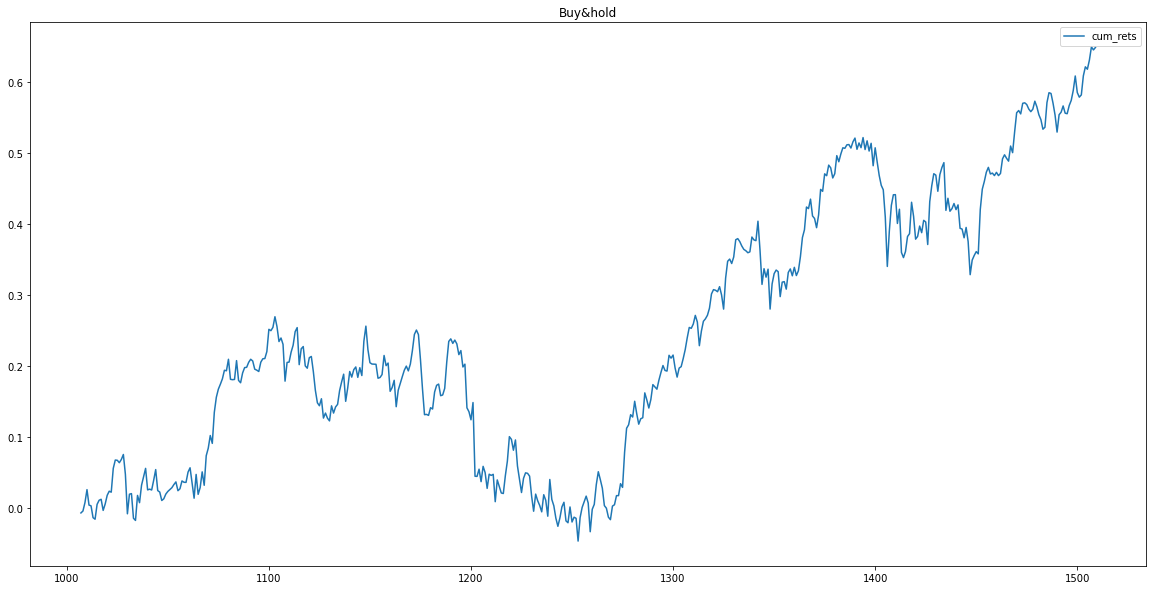

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = LVQ5[['cum_rets']].plot(kind='line', title ="Buy&hold",figsize=(20,10))
plt.show()

I didn't make obvious money in the early days of investing, but if I invest in the long term, my stock value will increase over time.